# Benchmarking Our Algorithm against others

In [2]:
import sys
sys.path.append('../')
from panav.environment.env import MultiTunnelEnv
from panav.hybrid import HybridGraph
from panav.util import flowtime,makespan
from panav.PBS.PBS import PBS
from panav.TrafficAwarePlanning import TAHP
from panav.sequential import sequential_planning
from panav.SAMP.solvers import Tube_Planning, Simple_MILP_Planning
from panav.viz import draw_hybrid,draw_env

from time import time
import pickle as pkl

%load_ext autoreload
%autoreload 2

Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-21


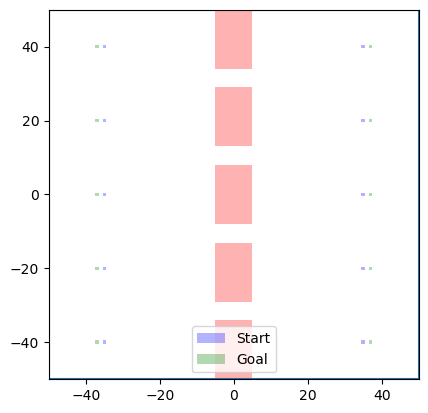

In [3]:
bloating_r = 0.5
N = 10
env = MultiTunnelEnv(n_tunnel = 4, tunnel_width = bloating_r*10, N_agent = N,wallthickness=10,limits=[(-50,50),(-50,50)])
HG = HybridGraph(env,bloating_r)
draw_env(HG.env,show_agent_ID=False)


In [4]:

bloating_r = 0.5
vmax = 1.0

n_agents = list(range(10,51,10))

TIMEOUT = 100 # timeout

# Algorithms
algs = {
        "S2M2": lambda hg: PBS(hg.env,vmax=vmax,bloating_r=bloating_r,low_level_planner="Simple_MILP_Planning",TIMEOUT=TIMEOUT)[0],
        "PBS_Tube": lambda hg: PBS(hg.env,vmax=vmax,bloating_r=bloating_r,low_level_planner="Tube_Planning",TIMEOUT=TIMEOUT)[0],
        "TAHP": lambda hg: TAHP(hg,vmax=vmax,bloating_r=bloating_r,TIMEOUT=TIMEOUT),
        "Seq_Tube": lambda hg: sequential_planning(Tube_Planning,hg.env,vmax,bloating_r,TIMEOUT=TIMEOUT),
        # "Seq_Temp_Obs": lambda hg: sequential_planning(Simple_MILP_Planning,hg.env,vmax,bloating_r,TIMEOUT=TIMEOUT)
        }

timeouted = {alg:False for alg in algs}



results = []

env_name = "MultiTunnel_Large"


# Experiments
for i in range(len(n_agents)):
    N = n_agents[i]
    env = MultiTunnelEnv(n_tunnel = 4, tunnel_width = bloating_r*2.5, N_agent = N,wallthickness=10,limits=[(-50,50),(-50,50)])
    HG = HybridGraph(env,bloating_r)

    for name,alg in algs.items():

        if timeouted[name]:
            continue
        
        print("Alg:", name, "N agent:",N)

        result = {}
        
        t0 = time()
        plan = alg(HG)
        t = time()-t0
        
        result['plan'] = plan
        result['time'] = t

        result['N_agent'] = N
        result['alg_name'] = name
        # Save checkpoint data

        result["TIMEOUT"]=TIMEOUT
        result["HG"]=HG

        results.append(result)

        
        if t>TIMEOUT:
            timeouted[name] = True
            print("Time out for algorithm", name, "N agent = ", N)

    # Save checkpoint data
    with open("./data/{}.pkl".format(env_name),'wb') as fp:
        pkl.dump(results,fp)


Alg: S2M2 N agent: 10
PBS Time Elapsed: 0.6180939674377441
PBS Time Elapsed: 0.7477118968963623
PBS Time Elapsed: 0.9157137870788574
PBS Time Elapsed: 1.0365240573883057
PBS Time Elapsed: 1.2921576499938965
PBS Time Elapsed: 1.3707363605499268
PBS Time Elapsed: 1.5805473327636719
PBS Time Elapsed: 1.8489079475402832
PBS Time Elapsed: 2.132996082305908
PBS Time Elapsed: 2.2571606636047363
PBS Time Elapsed: 2.4272897243499756
PBS Time Elapsed: 2.637281894683838
PBS Time Elapsed: 2.8780677318573
PBS Time Elapsed: 3.155019760131836
PBS Time Elapsed: 3.728926658630371
PBS Time Elapsed: 3.809790849685669
PBS Time Elapsed: 4.039086580276489
PBS Time Elapsed: 4.198425054550171
PBS Time Elapsed: 4.609649896621704
PBS Time Elapsed: 5.3807289600372314
PBS Time Elapsed: 5.983989715576172
PBS Time Elapsed: 6.1175148487091064
PBS Time Elapsed: 6.365384101867676
PBS Time Elapsed: 6.610263109207153
PBS Time Elapsed: 7.034570932388306
PBS Time Elapsed: 7.5295867919921875
PBS Time Elapsed: 7.67763471603

KeyboardInterrupt: 